<a href="https://colab.research.google.com/github/bharathi1227/customer-segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Import the Power Tools
import pandas as pd # To handle our data table
import matplotlib.pyplot as plt # To draw basic graphs
import seaborn as sns # To make graphs look pretty
from sklearn.cluster import KMeans # The AI algorithm that does the grouping
from sklearn.preprocessing import StandardScaler # To make all numbers fair (Scaling)
import plotly.express as px # For the "Novelty" 3D interactive graph

# STEP 2: Load the data
df = pd.read_csv('Mall_Customers.csv')

# STEP 3: Look at the first 5 rows to make sure it works
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# STEP 1: Check for missing data (errors)
print("Missing values in each column:")
print(df.isnull().sum())

# STEP 2: Select the columns we want to use for grouping
# We pick: Age, Annual Income, and Spending Score
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# STEP 3: Scale the data (The "Fairness" step)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 4: Look at the scaled data
print("\nScaled Data (First 5 rows):")
print(X_scaled[:5])

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Scaled Data (First 5 rows):
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


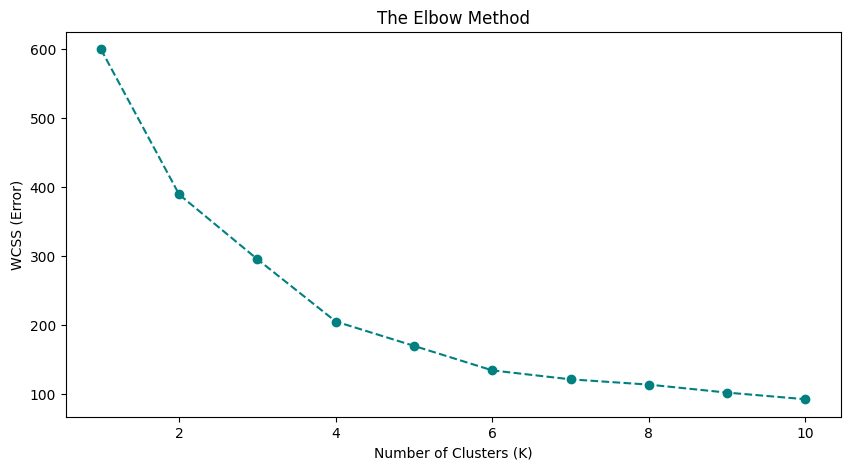

In [3]:
# STEP 1: Create an empty list to store the "errors" (WCSS)
wcss = []

# STEP 2: Run K-Means for 1 to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS value

# STEP 3: Plot the Elbow Graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='teal')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Error)')
plt.show()

In [5]:
# STEP 1: Run the final K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled) # We add the group labels back to our original table

# STEP 2: Create the "Top Performer" 3D Interactive Plot
fig = px.scatter_3d(df,
                    x='Age',
                    y='Annual Income (k$)',
                    z='Spending Score (1-100)',
                    color='Cluster',
                    title='Interactive 3D Customer Segments',
                    opacity=0.8,
                    hover_data=['Gender']) # Shows gender when you hover your mouse!

fig.show()

# STEP 3: Print a summary of each group
print("\n--- Average Values for Each Customer Group ---")
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


--- Average Values for Each Customer Group ---
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871
